# 卷积神经网络

## 项目：为小狗识别应用编写算法 

---

在此 notebook 中，我们已经为你提供一些模板代码，要成功完成此项目，你需要实现其他功能。除此之外，不需要修改所提供的代码。标题中以**（实现）**开头的部分表明你必须在下面的代码块中提供其他功能。我们会在每个部分提供说明，并在以“TODO”开头的代码块中提供实现细节。请仔细阅读说明。 

> **注意**：完成所有代码实现后，最后需要将 iPython Notebook 导出为 HTML 文档。在将 notebook 导出为 HTML 前，请运行所有代码单元格，使审阅者能够查看最终实现和输出结果。然后导出 notebook，方法是：使用顶部的菜单并依次转到**文件 -> 下载为 -> HTML (.html)**。提交内容应该同时包含此 notebook 和完成的文档。

除了实现代码之外，还需要回答与项目和代码实现相关的问题。请仔细阅读每个问题，并在**答案：**下方的文本框中填写答案。我们将根据每个问题的答案以及实现代码评估你提交的项目。

>**注意：**可以通过 **Shift + Enter** 键盘快捷键执行代码和标记单元格，并且可以通过双击单元格进入编辑模式，编辑标记单元格。

审阅标准还包含可选的“锦上添花”建议，可以指导你在满足最低要求的基础上改进项目。如果你打算采纳这些建议，则应该在此 Jupyter notebook 中添加代码。



---
### 为何要完成这道练习 

在此 notebook 中，你将开发一种可用于移动应用或网络应用的算法。最终你的代码将能够将任何用户提供的图像作为输入。如果从图像中检测出小狗，该算法将大致识别出小狗品种。如果检测出人脸，该算法将大致识别出最相似的小狗品种。下图显示了最终项目的潜在示例输出（但是我们希望每个学员的算法行为都不一样。）。 

![Sample Dog Output](images/sample_dog_output.png)

在此实际应用中，你需要将一系列模型整合到一起并执行不同的任务；例如，检测图中人脸的算法与推理小狗品种的 CNN 将不一样。有很多地方都可能会出错，没有什么完美的算法。即使你的答案不完美，也可以创造有趣的用户体验。

### 项目规划

我们将此 notebook 分成了几个独立的步骤。你可以通过以下链接浏览此 notebook。

* [第 0 步](#step0)：导入数据集
* [第 1 步](#step1)：检测人脸
* [第 2 步](#step2)：检测小狗
* [第 3 步](#step3)：（从头开始）创建分类小狗品种的 CNN
* [第 4 步](#step4)：（使用迁移学习）创建分类小狗品种的 CNN
* [第 5 步](#step5)：编写算法
* [第 6 步](#step6)：测试算法

---
<a id='step0'></a>
## 第 0 步：导入数据集

首先下载人脸和小狗数据集：
* 下载[小狗数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip)。解压文件并将其放入此项目的主目录中，位置为 `/dog_images`。 

* 下载[人脸数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip)。解压文件并将其放入此项目的主目录中，位置为 `/lfw`。  

*注意如果你使用的是 Windows 设备，建议使用 [7zip](http://www.7-zip.org/) 解压文件。*

在下面的代码单元格中将人脸 (LFW) 数据集和小狗数据集的文件路径保存到 NumPy 数组 `human_files` 和 `dog_files` 中。

In [1]:
%matplotlib inline 

import os
import numpy as np
import cv2                
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

human_dir = '/home/ubuntu/Datum/datum/DeepLearning/lfw'
dog_dir = '/home/ubuntu/Datum/datum/DeepLearning/dogImages'

if not os.path.exists(human_dir):
    human_dir = './dataset/lfw'
    dog_dir = './dataset/dogImages'

# load filenames for human and dog images
human_files = np.array(glob(human_dir+"/*/*"))
dog_files = np.array(glob(dog_dir+"/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## 第 1 步：检测人脸

在此部分，我们使用 OpenCV 的[哈儿特征级联分类器](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)检测图像中的人脸。  

OpenCV 提供了很多预训练的人脸检测器，它们以 XML 文件的形式存储在 [github](https://github.com/opencv/opencv/tree/master/data/haarcascades) 上。我们下载了其中一个检测器并存储在 `haarcascades` 目录中。在下个代码单元格中，我们将演示如何使用此检测器从样本图像中检测人脸。

Number of faces detected: 1


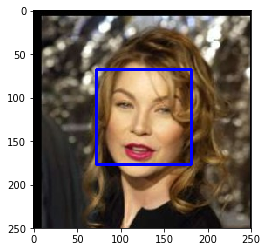

In [2]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

在使用任何人脸检测器之前，标准做法是将图像转换为灰阶图像。`detectMultiScale` 函数会执行存储在 `face_cascade` 中的分类器并将灰阶图像当做参数。  

在上述代码中，`faces` 是一个包含检测到的人脸的 numpy 数组，其中每行对应一张检测到的人脸。检测到的每张人脸都是一个一维数组，其中有四个条目，分别指定了检测到的人脸的边界框。数组中的前两个条目（在上述代码中提取为 `x` 和`y`）指定了左上角边界框的水平和垂直位置。数组中的后两个条目（提取为 `w` 和 `h`）指定了边界框的宽和高。

### 编写人脸检测器

我们可以编写一个函数，如果在图像中检测到人脸，该函数将返回 `True`，否则返回 `False`。此函数称为 `face_detector`，参数为图像的字符串文件路径，并出现在以下代码块中。

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### （实现）评估人脸检测器

__问题 1：__使用以下代码单元格测试 `face_detector` 函数的性能。  
- 对于 `human_files` 中的前100 张图像，有多少图像检测到了人脸？  
- 对于 `dog_files` 中的前100 张图像，有多少图像检测到了人脸？ 

理想情况下，我们希望所有人脸图像都能检测到人脸，所有小狗图像都不能检测到人脸。我们的算法不能满足此目标，但是依然达到了可接受的水平。我们针对每个数据集的前 100 张图像提取出文件路径，并将它们存储在 numpy 数组 `human_files_short` 和 `dog_files_short` 中。

__答案：__ 
在前100张图像中，97张(97%)human_files检测到了人脸，15张(15%)dog_files中检测到了人脸

In [4]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#    
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_acc = 0
dog_acc = 0
for human, dog in tqdm(zip(human_files_short, dog_files_short)):
    if face_detector(human):
        human_acc+=1
    if face_detector(dog):
        dog_acc+=1

print("human accuracy {} dog accuracy {}".format(human_acc/100.0, 
                                                dog_acc/100.0))

100it [00:13, 10.59it/s]

human accuracy 0.97 dog accuracy 0.15


建议在算法中使用 OpenCV 的人脸检测器来检测人脸图像，但是你也可以尝试其他方法，尤其是利用深度学习的方法:)。请在以下代码单元格中设计并测试你的人脸检测算法。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## 第 2 步：检测小狗

在此部分，我们使用[预训练的模型](http://pytorch.org/docs/master/torchvision/models.html)检测图像中的小狗。  

### 获取预训练的 VGG-16 模型

以下代码单元格会下载 VGG-16 模型以及在 [ImageNet](http://www.image-net.org/) 上训练过的权重，ImageNet 是一个非常热门的数据集，可以用于图像分类和其他视觉任务。ImageNet 包含 1000 万以上的 URL，每个都链接到包含某个对象的图像，这些对象分成了 [1000 个类别](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)。

In [6]:
%matplotlib inline 

import os
import numpy as np
import cv2                
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from tqdm import tqdm

import torch
import torchvision.models as models
import torchvision.transforms as transforms

human_dir = '/home/ubuntu/Datum/datum/DeepLearning/lfw'
dog_dir = '/home/ubuntu/Datum/datum/DeepLearning/dogImages'

if not os.path.exists(human_dir):
    human_dir = './dataset/lfw'
    dog_dir = './dataset/dogImages'

# load filenames for human and dog images
human_files = np.array(glob(human_dir+"/*/*"))
dog_files = np.array(glob(dog_dir+"/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [7]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print(use_cuda)
# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
print(VGG16)

True
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): C

如果给定一张图像，此预训练的 VGG-16 模型能够针对图像中的对象返回预测结果（属于 ImageNet 中的 1000 个潜在类别之一）。

### （实现）使用预训练的模型做出预测

在下个代码单元格中，你将编写一个函数，它将图像路径（例如 `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`）当做输入，并返回预训练 VGG-16 模型预测的 ImageNet 类别对应的索引。输出应该始终是在 0 - 999（含）之间的整数。

在编写该函数之前，请阅读此 [PyTorch 文档](http://pytorch.org/docs/stable/torchvision/models.html)，了解如何针对预训练的模型预处理张量。

In [8]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from Bhe given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(fp=img_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    data = transform(img)
    c, h, w = data.shape
    data = data.reshape(1, c, h, w)
    VGG16.eval()
    
    if use_cuda:
        data = data.cuda()
        
    x = VGG16(data)
    ps = torch.nn.functional.softmax(x, dim=1)
    
    np_ps = ps.cpu().detach().numpy()
    np_ps = np_ps.squeeze()
    return np.argmax(np_ps) # predicted class index

In [9]:
VGG16_predict(os.path.join(dog_dir, 'train', '001.Affenpinscher', 'Affenpinscher_00001.jpg'))

252

### （实现）编写小狗检测器

查看该[字典](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)后，你将发现：小狗对应的类别按顺序排列，对应的键是 151-268（含），包含从 `'Chihuahua'` 到 `'Mexican hairless'` 的所有类别。因此，要检查预训练的 VGG-16 模型是否预测某个图像包含小狗，我们只需检查预训练模型预测的索引是否在 151 - 268（含）之间。

请根据这些信息完成下面的 `dog_detector` 函数，如果从图像中检测出小狗，它将返回 `True`（否则返回 `False`）。

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return index>=151 and index<268

### （实现）评估小狗检测器

__问题 2：__在以下代码单元格中测试 `dog_detector` 的效果。  
- 对于 `human_files_short` 中的图像，有多少图像检测到了小狗？  
- 对于 `dog_files_short` 中的图像，有多少图像检测到了小狗？

__答案：__
在所有的human_files_short中都没有检测到小狗
在98张dog_files_short中检测到了小狗

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_acc = 0
dog_acc = 0
for human, dog in tqdm(zip(human_files_short, dog_files_short)):
    if dog_detector(human):
        human_acc+=1
    if dog_detector(dog):
        dog_acc+=1

print("human accuracy {} dog accuracy {}".format(human_acc/100.0, 
                                                dog_acc/100.0))


100it [00:05, 17.82it/s]

human accuracy 0.0 dog accuracy 0.98


建议在算法中使用 VGG-16 检测小狗图像，但是你也可以尝试其他预训练的网络（例如 [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3)、[ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3) 等）。请在以下代码单元格中测试其他预训练的 PyTorch 模型。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## 第 3 步：（从头开始）创建分类小狗品种的 CNN

创建好从图像中检测人脸和小狗的函数后，我们需要预测图像中的小狗品种。在这一步，你需要创建一个分类小狗品种的 CNN。你必须从头创建一个 CNN（因此暂时不能使用迁移学习。），并且测试准确率必须至少达到 10%。在此 notebook 的第 4 步，你将使用迁移学习创建 CNN，并且能够获得很高的准确率。

预测图中小狗的品种是一项非常难的挑战。说实话，即使是我们人类，也很难区分布列塔尼猎犬和威尔斯激飞猎犬。  

布列塔尼猎犬 | 威尔斯激飞猎犬
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

还有很多其他相似的狗品种（例如卷毛寻回犬和美国水猎犬）。  

卷毛寻回犬 | 美国水猎犬
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


同理，拉布拉多有黄色、巧克力色和黑色品种。基于视觉的算法需要克服这种同一类别差异很大的问题，并决定如何将所有这些不同肤色的小狗分类为相同的品种。  

黄色拉布拉多 | 巧克力色拉布拉多 | 黑色拉布拉多
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

随机猜测的效果很差：除了类别数量不太平衡之外，随机猜测的正确概率约为 1/133，准确率不到 1%。  

在深度学习领域，实践比理论知识靠谱得到。请尝试多种不同的架构，并相信你的直觉。希望你可以从学习中获得乐趣！

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dog_images/train`、`dog_images/valid` 和 `dog_images/test` 下）。[此自定义数据集文档](http://pytorch.org/docs/stable/torchvision/datasets.html)或许对你有帮助。如果你想增强训练和/或验证数据，请参阅各种[转换方法](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)！

In [14]:
%matplotlib inline

import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torchvision import datasets
from glob import glob
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

human_dir = '/home/ubuntu/Datum/datum/DeepLearning/lfw'
dog_dir = '/home/ubuntu/Datum/datum/DeepLearning/dogImages'

if not os.path.exists(human_dir):
    human_dir = './dataset/lfw'
    dog_dir = './dataset/dogImages'

# load filenames for human and dog images
human_files = np.array(glob(human_dir+"/*/*"))
dog_files = np.array(glob(dog_dir+"/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [15]:
other_transforms = transforms.Compose([transforms.Resize(size=(224, 224)), 
                                       transforms.ToTensor()])

train_data = datasets.ImageFolder(os.path.join(dog_dir, 'train'),transform=other_transforms)
train_loader = torch.utils.data.DataLoader(train_data,  batch_size=32, shuffle=True)

c0_means = 0
c1_means = 0
c2_means = 0
c0_stds = 0
c1_stds = 0
c2_stds = 0
total = 0
for idx, (data, label) in enumerate(train_loader):
    c0, c1, c2 = data[:,0,:,:], data[:,1,:,:], data[:,2,:,:]
    c0_means += torch.mean(c0)
    c1_means += torch.mean(c1)
    c2_means += torch.mean(c2)
    c0_stds += torch.std(c0)
    c1_stds += torch.std(c1)
    c2_stds += torch.std(c2)
    total += 1
    
print(">>> mean {}",format([c0_means/total, c1_means/total, c2_means/total ]))
print(">>> std {}",format([c0_stds/total, c1_stds/total, c2_stds/total ]))


>>> mean {} [tensor(0.4870), tensor(0.4665), tensor(0.3972)]
>>> std {} [tensor(0.2595), tensor(0.2541), tensor(0.2597)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([101,  79,  99, 120,   0,  14,  33,  97, 118,  78,  16,   1,  43, 115,
         30,  37,  23,  41, 123,  51,  14, 114,  30,  44])
torch.Size([24, 3, 224, 224])


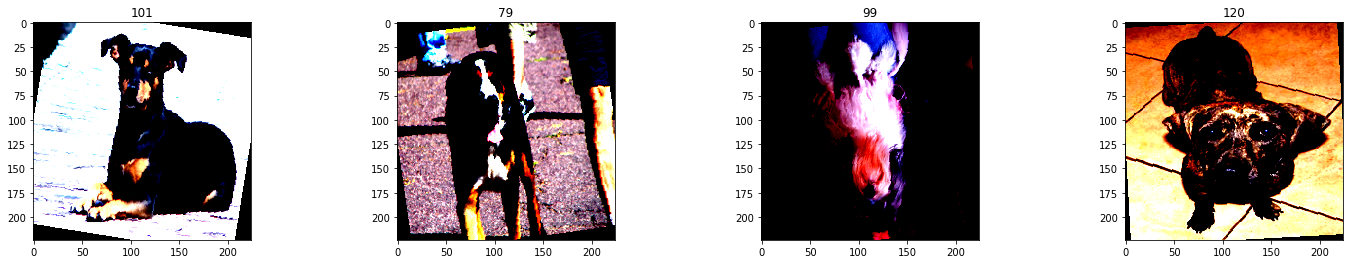

133


In [16]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                       transforms.RandomRotation(degrees=10),
                                       transforms.RandomHorizontalFlip(p=0.2),
                                       transforms.RandomVerticalFlip(p=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean = (0.4870, 0.4665, 0.3972), std = (0.2595, 0.2541, 0.2598))])
other_transforms = transforms.Compose([transforms.Resize(size=(224, 224)), 
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean = (0.4870, 0.4665, 0.3972), std = (0.2595, 0.2541, 0.2598))])


train_data = datasets.ImageFolder(os.path.join(dog_dir, 'train'),transform=train_transforms)
test_data = datasets.ImageFolder(os.path.join(dog_dir, 'test'), transform=other_transforms)
valid_data = datasets.ImageFolder(os.path.join(dog_dir, 'valid'), transform=other_transforms)

train_loader = torch.utils.data.DataLoader(train_data,  batch_size=24, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=2, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=2, shuffle=True)

train_loader_iter = iter(train_loader)
train_images, train_labels = next(train_loader_iter)

print(train_labels)
print(train_images.shape)
fig, axes = plt.subplots(figsize=(25,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    image = train_images[ii,:,:,:].numpy().transpose((1, 2, 0))
    ax.imshow(image)
    ax.set_title(str(train_labels[ii].item()))
    
plt.show()
print(len(train_data.classes))

**问题 3：**描述你所选的数据预处理流程。 
- 你是如何调整图像大小的（裁剪、拉伸等）？你选择的输入张量大小是多少，为何？
- 你是否决定增强数据集？如果是，如何增强（平移、翻转、旋转等）？如果否，理由是？


**答案**：
1. 对图像进行了暴力resize操作（应该算是拉伸），并没有进行剪裁，原因是剪裁之后的图像很可能是狗的一部分或者是人的部分，使得训练变难，输入的tensor大小为224*224，和CIFAR一致。
2. 数据集的增强包括旋转和水平垂直翻转，平移的问题也是会使得图像仅仅看到部分，而平移的太少感觉和没平移一个样，因此没有做平移操作

### （实现）模型架构

创建分类小狗品种的 CNN。使用以下代码单元格中的模板。

In [17]:
use_cuda = torch.cuda.is_available()

class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        self.features = nn.Sequential(*[
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ])
        self.avgpooling = nn.AvgPool2d(kernel_size=1, stride=1)
        self.classifiy = nn.Sequential(*[
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(512, num_classes)
        ])
        
    def forward(self, x):
        x = self.features(x)
        x = self.avgpooling(x)
        x = x.view(x.shape[0],-1)
        x = self.classifiy(x)
        return x

model_scratch = Net(len(train_data.classes))
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

print(model_scratch)
    

Net(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=

__问题 4：__列出获得最终 CNN 结构的步骤以及每步的推理过程。  

__答案：__ 
1. 网络的结构采用VGG-11的方式，不过在每个层上都添加了BN层加速训练，且在最后的classify层将fc2的通道数变为了512以减少网络的大小
2. 推理过程 
> a. 输入为3*224*224的图像；
> 
> b. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到64个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换；
> 
> c. 通过max pooling层把特征图的size缩小一半；
>
> d. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到128个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换
>
> e. 通过max pooling层把特征图的size缩小一半
>
> f. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到256个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换
>
> g. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到256个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换
>
> h. 通过max pooling层把特征图的size缩小一半
>
> i. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到512个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换
>
> j. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到512个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换
>
> k. 通过max pooling层把特征图的size缩小一半
>
> l. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到512个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换
>
> m. 经过kernel=3*3,stride=1,padding=1的卷积核之后，得到512个特征图，随后经过BN进行归一化，最后使用relu激活函数进行非线性变换
>
> n. 通过max pooling层把特征图的size缩小一半，可以看到整个feature部分对输入图像缩小了2^5=32倍
>
> o. 通过一个平均池化层进行特征图的大小变换，这里按理说应该使用adaptive的方式，笔者尝试了一下效果是一样的，因为在这个场景下这个地方根本不需要resize
>
> p. 把tensor拉平为向量，大小为7*7*512
>
> q. 之后输入三个全连接层进行特征的融合，中间使用relu进行激活，使用drop out的方式防止过拟合


### （实现）指定损失函数和优化器

在下个代码单元格中指定[损失函数](http://pytorch.org/docs/stable/nn.html#loss-functions)和[优化器](http://pytorch.org/docs/stable/optim.html)。在下面将所选的损失函数另存为 `criterion_scratch`，并将优化器另存为 `optimizer_scratch`。

In [18]:
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)

print(len(train_loader.dataset))
loaders_scratch = {'train':train_loader, 'valid':valid_loader, 'test': test_loader}

6680


### （实现）训练和验证模型

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_scratch.pt'`。

In [20]:
# model_scratch.load_state_dict(torch.load('model_scratch.pt'))
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        train_acc = 0.0
        vaild_acc = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            xs = model(data)
            loss = criterion(xs, target)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            ps = F.softmax(xs, dim=1)
            _, pred = torch.max(ps, dim=1)
            acc = (pred.eq(target.view_as(pred))).cpu().sum().item()
            train_acc += acc
            if batch_idx%20 == 19:
                print(">>> idx {} loss: {:.3f}  acc {}       ".format(batch_idx, loss.item(), acc, end='\r'))
            train_loss += (1/(batch_idx+1))*(loss.item()-train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                xs = model(data)
                loss = criterion(xs, target)
                ps = F.softmax(xs, dim=1)
                _, pred = torch.max(ps, dim=1)
                acc = (pred.eq(target.view_as(pred))).cpu().sum().item()
                vaild_acc += acc
                valid_loss += (1/(batch_idx+1))*(loss.item()-valid_loss)
            
        train_total = len(loaders['train'].dataset)+1
        vaild_total = len(loaders['valid'].dataset)+1
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss,valid_loss),
              'train acc: {} test acc {}'.format(train_acc/train_total, vaild_acc/vaild_total))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model.state_dict(),save_path)
        
    # return trained model
    return model

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 10%。

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [ ]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [21]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.408259


Test Accuracy: 16% (136/836)


---
<a id='step4'></a>
## 第 4 步：（使用迁移学习）创建分类小狗品种的 CNN

现在你将使用迁移学习创建能够识别图中小狗品种的 CNN。你的 CNN 必须在测试集上至少达到 60% 的准确率。

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dogImages/train`、`dogImages/valid` 和 `dogImages/test` 下）。 

**你也可以使用在从头开始创建 CNN 这一步时创建的同一数据加载器**。

There are 13233 total human images.
There are 8351 total dog images.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 68,  33,  49,  37,   5,  33,   0,  79,  30, 122, 108,  40,  67,  28,
          7, 129,  97,  49,  14, 106,  47,  21,  86,  41])
torch.Size([24, 3, 224, 224])


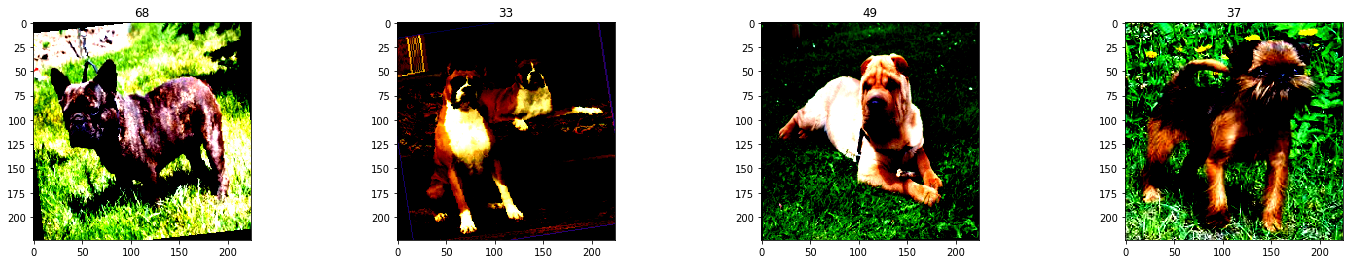

133


In [22]:
## TODO: Specify data loaders
%matplotlib inline

import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import datasets
from glob import glob
from PIL import Image

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

human_dir = '/home/ubuntu/Datum/datum/DeepLearning/lfw'
dog_dir = '/home/ubuntu/Datum/datum/DeepLearning/dogImages'

if not os.path.exists(human_dir):
    human_dir = './dataset/lfw'
    dog_dir = './dataset/dogImages'

# load filenames for human and dog images
human_files = np.array(glob(human_dir+"/*/*"))
dog_files = np.array(glob(dog_dir+"/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                       transforms.RandomRotation(degrees=10),
                                       transforms.RandomHorizontalFlip(p=0.2),
                                       transforms.RandomVerticalFlip(p=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean = (0.4870, 0.4665, 0.3972), std = (0.2595, 0.2541, 0.2598))])
other_transforms = transforms.Compose([transforms.Resize(size=(224, 224)), 
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean = (0.4870, 0.4665, 0.3972), std = (0.2595, 0.2541, 0.2598))])


train_data = datasets.ImageFolder(os.path.join(dog_dir, 'train'),transform=train_transforms)
test_data = datasets.ImageFolder(os.path.join(dog_dir, 'test'), transform=other_transforms)
valid_data = datasets.ImageFolder(os.path.join(dog_dir, 'valid'), transform=other_transforms)

train_loader = torch.utils.data.DataLoader(train_data,  batch_size=24, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=2, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=2, shuffle=True)

train_loader_iter = iter(train_loader)
train_images, train_labels = next(train_loader_iter)

print(train_labels)
print(train_images.shape)
fig, axes = plt.subplots(figsize=(25,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    image = train_images[ii,:,:,:].numpy().transpose((1, 2, 0))
    ax.imshow(image)
    ax.set_title(str(train_labels[ii].item()))
    
plt.show()
print(len(train_data.classes))

### （实现）模型架构

使用迁移学习创建分类小狗品种的 CNN。在以下代码单元格中填写代码并将初始化的模型另存为变量 `model_transfer`。

In [23]:
## TODO: Specify model architecture 
use_cuda = torch.cuda.is_available()

model_transfer = models.resnet50(pretrained=True)

model_transfer.fc = nn.Linear(2048, len(train_data.classes))

if use_cuda:
    model_transfer = model_transfer.cuda()
    
# print(model_transfer)

__问题 5：__列出获得最终 CNN 结构的步骤以及每步的推理过程。解释为何该结构适合解决手头的问题。

__答案：__ 
1. 模型结构为resnet-50，将最后的全连接层从2048->1000变为2048->133(训练的类别数量)
2. resnet的推理和VGG类似，但是每个bottleneck的输入和输出直接相加作为最终的输出，随后进行激活函数的激活。（写推理过程太麻烦了，求放过...）
3. 该模型相比于其他的模型，具有收敛速度快，模型最终的大小比较小的优点，且模型的输入图像大小为224*224，和训练图像的大小是一样的。由于该模型在cifar训练集上取得了不错的效果，且cifar上是有狗的训练集，使用这样的预训练模型应该能使整个训练过程更快。


### （实现）指定损失函数和优化器

在下个代码单元格中指定[损失函数](http://pytorch.org/docs/master/nn.html#loss-functions)和[优化器](http://pytorch.org/docs/master/optim.html)。在下面将所选的损失函数另存为 `criterion_transfer`，并将优化器另存为 `optimizer_transfer`。

In [24]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(params=model_transfer.parameters(), lr=0.1)
loaders_transfer = {'train':train_loader, 'valid':valid_loader, 'test': test_loader}
data_transfer = {'train':train_data, 'valid':valid_data, 'test': test_data}

### （实现）训练和验证模型。

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_transfer.pt'`。

In [25]:
# train the model
n_epochs = 20

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# 
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

>>> idx 19 loss: 5.088  acc 0       
>>> idx 39 loss: 3.150  acc 7       
>>> idx 59 loss: 3.122  acc 6       
>>> idx 79 loss: 2.979  acc 4       
>>> idx 99 loss: 2.430  acc 9       
>>> idx 119 loss: 2.594  acc 6       
>>> idx 139 loss: 2.947  acc 4       
>>> idx 159 loss: 2.422  acc 9       
>>> idx 179 loss: 2.396  acc 10       
>>> idx 199 loss: 2.184  acc 8       
>>> idx 219 loss: 2.276  acc 8       
>>> idx 239 loss: 2.081  acc 10       
>>> idx 259 loss: 1.660  acc 12       
Epoch: 1 	Training Loss: 2.634566 	Validation Loss: 8.029501 train acc: 0.3370752881305194 test acc 0.08253588516746412
>>> idx 19 loss: 1.603  acc 12       
>>> idx 39 loss: 2.175  acc 8       
>>> idx 59 loss: 2.711  acc 9       
>>> idx 79 loss: 1.760  acc 11       
>>> idx 99 loss: 1.885  acc 13       
>>> idx 119 loss: 1.609  acc 12       
>>> idx 139 loss: 1.280  acc 15       
>>> idx 159 loss: 1.506  acc 12       
>>> idx 179 loss: 2.002  acc 9       
>>> idx 199 loss: 0.980  acc 17       
>>> id

>>> idx 99 loss: 0.372  acc 22       
>>> idx 119 loss: 0.137  acc 22       
>>> idx 139 loss: 0.496  acc 20       
>>> idx 159 loss: 0.147  acc 23       
>>> idx 179 loss: 0.287  acc 22       
>>> idx 199 loss: 0.262  acc 22       
>>> idx 219 loss: 0.481  acc 21       
>>> idx 239 loss: 0.543  acc 20       
>>> idx 259 loss: 0.418  acc 22       
Epoch: 14 	Training Loss: 0.264368 	Validation Loss: 4.386904 train acc: 0.9166292471186948 test acc 0.3157894736842105
>>> idx 19 loss: 0.156  acc 23       
>>> idx 39 loss: 0.201  acc 22       
>>> idx 59 loss: 0.209  acc 22       
>>> idx 79 loss: 0.119  acc 23       
>>> idx 99 loss: 0.235  acc 22       
>>> idx 119 loss: 0.503  acc 20       
>>> idx 139 loss: 0.189  acc 22       
>>> idx 159 loss: 0.542  acc 22       
>>> idx 179 loss: 0.220  acc 23       
>>> idx 199 loss: 0.244  acc 22       
>>> idx 219 loss: 0.210  acc 22       
>>> idx 239 loss: 0.487  acc 21       
>>> idx 259 loss: 0.192  acc 22       
Epoch: 15 	Training Loss: 0.

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 60%。

In [25]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.955241


Test Accuracy: 76% (636/836)


### （实现）使用模型预测小狗品种

编写一个函数，它会将图像路径作为输入，并返回模型预测的小狗品种（`Affenpinscher`、`Afghan hound` 等）。

In [26]:
a = torch.rand(1,3)
max_p, max_i = torch.max(a,dim=1)
print(max_p.shape, max_i.shape)

torch.Size([1]) torch.Size([1])


In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
transform = other_transforms

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    img = Image.open(img_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = transform(img)
    c, h, w = img.shape
    img = img.reshape(1, c, h, w)
    
    if use_cuda:
        img = img.cuda()
        
    model_transfer.eval()
    xs = model_transfer(img)
    ps = F.softmax(xs, dim=1)
    predp, predi = torch.max(ps, dim=1)
    idx = predi.cpu().detach()[0]
    return class_names[idx]

---
<a id='step5'></a>
## 第 5 步：编写算法

编写一个算法，它会将图像的文件路径作为输入，并首先判断图像中是否包含人脸、小狗，或二者都不含。然后，
- 如果在图像中检测到了__小狗__，则返回预测的品种。
- 如果在图像中检测到了__人脸__，则返回相似的小狗品种。
- 如果二者都没检测到，则输出错误消息。

你可以自己编写从图像中检测人脸和小狗的函数，当然也可以使用上面开发的 `face_detector` 和 `human_detector` 函数。你必须使用在第 4 步创建的 CNN 预测小狗品种。  

下面提供了一些示例算法输出，但是你也可以自己设计用户体验。

![Sample Human Output](images/sample_human_output.png)


### （实现）编写算法

In [28]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path=img_path):
        print(">>> detect dog, and breed is ", predict_breed_transfer(img_path))
    elif face_detector(img_path):
        print(">>> detect human, similar dog breed is ", predict_breed_transfer(img_path))
    else:
        print(">>> detect nothing!!!")

---
<a id='step6'></a>
## 第 6 步：测试算法

在此部分测试新算法啦。算法认为看起来像哪种小狗？如果你有一只狗，算法能准确预测出小狗的品种吗？如果你有一只猫，算法会错误地认为这只猫是小狗吗？

### （实现）在样本图像上测试算法。

至少在计算机上用 6 张图像测试你的算法。你可以使用任何图像。至少测试两张人脸图像和两张小狗图像。  

__问题 6：__结果比你预期的要好吗 :)?还是更糟糕 :(？请对你的算法提出至少三个值得改进的地方。
结果相对来说比预期的好一些， 从结果上看大多数都预测对了

__答案：__（三个值得改进的地方）
1. 增加训练次数，以改善模型的精度，目前只训练了20次，准确率在70%左右
2. 从对猫咪图的预测来看，颜色对于网络结果的影响还是比较大的
3. 网络结构上可以变得更深，例如使用resnet101/121进行训练


```python
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
```

In [30]:
for file in np.hstack((human_files[:30], dog_files[:30])):
    print(file)
    run_app(file)

/home/ubuntu/Datum/datum/DeepLearning/lfw/Ellen_Pompeo/Ellen_Pompeo_0001.jpg
>>> detect human, similar dog breed is  Bearded collie
/home/ubuntu/Datum/datum/DeepLearning/lfw/Richard_Rodriguez/Richard_Rodriguez_0001.jpg
>>> detect human, similar dog breed is  Lowchen
/home/ubuntu/Datum/datum/DeepLearning/lfw/Michael_Chertoff/Michael_Chertoff_0001.jpg
>>> detect human, similar dog breed is  Chihuahua
/home/ubuntu/Datum/datum/DeepLearning/lfw/Julio_Iglesias_Jr/Julio_Iglesias_Jr_0002.jpg
>>> detect human, similar dog breed is  Bearded collie
/home/ubuntu/Datum/datum/DeepLearning/lfw/Julio_Iglesias_Jr/Julio_Iglesias_Jr_0001.jpg
>>> detect human, similar dog breed is  Labrador retriever
/home/ubuntu/Datum/datum/DeepLearning/lfw/Davey_Johnson/Davey_Johnson_0001.jpg
>>> detect human, similar dog breed is  Basenji
/home/ubuntu/Datum/datum/DeepLearning/lfw/Jessica_Simpson/Jessica_Simpson_0001.jpg
>>> detect human, similar dog breed is  Dogue de bordeaux
/home/ubuntu/Datum/datum/DeepLearning/lfw/

In [31]:
cat_dir = '/home/ubuntu/Datum/datum/DeepLearning/cats'
cat_files = np.array(glob(cat_dir+"/*"))
for file in cat_files:
    print(file)
    run_app(file)


/home/ubuntu/Datum/datum/DeepLearning/cats/breed1.jpg
>>> detect nothing!!!
/home/ubuntu/Datum/datum/DeepLearning/cats/breed3.jpg
>>> detect dog, and breed is  Manchester terrier
/home/ubuntu/Datum/datum/DeepLearning/cats/breed2.jpg
>>> detect nothing!!!


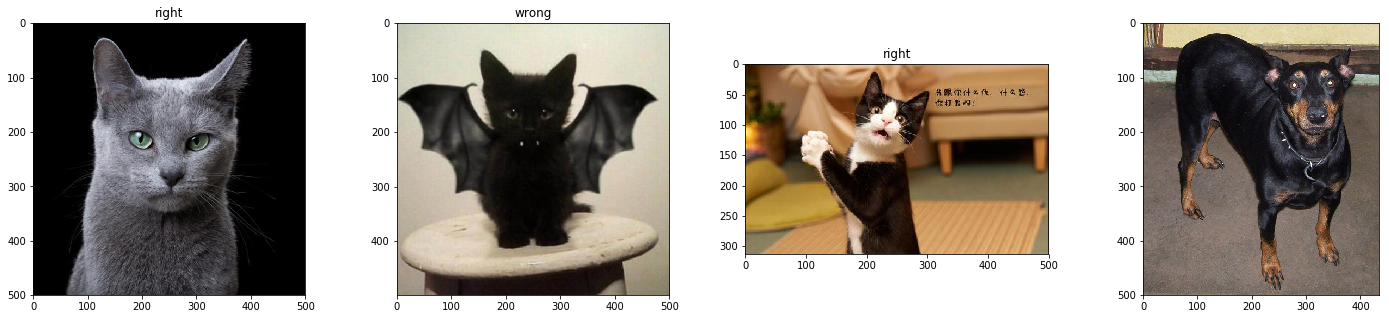

In [38]:
fig, axes = plt.subplots(figsize=(25,5), ncols=4)
for i, file in enumerate(cat_files):
    img = Image.open(file)
    axe = axes[i]
    axe.imshow(img)
    if file == '/home/ubuntu/Datum/datum/DeepLearning/cats/breed3.jpg':
        axe.set_title('wrong')
    else:
        axe.set_title('right')
img = Image.open('/home/ubuntu/Datum/datum/DeepLearning/dogImages/train/102.Manchester_terrier/Manchester_terrier_06774.jpg')
axes[-1].imshow(img)
plt.show()